## Q1: Is there any pattern between the profitability of a film and the date/year/month/decade it is released?

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
#load individual files to individual dataframes
tmdb_movies = pd.DataFrame(pd.read_csv('./zippedData/tmdb.movies.csv'))
imdb_crew = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.crew.csv'))
tn_budgets = pd.DataFrame(pd.read_csv('./zippedData/tn.movie_budgets.csv'))
imdb_ratings = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.ratings.csv'))
imdb_name_basics = pd.DataFrame(pd.read_csv('./zippedData/imdb.name.basics.csv'))
imdb_principals = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.principals.csv'))
imdb_akas = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.akas.csv'))
bom_gross = pd.DataFrame(pd.read_csv('./zippedData/bom.movie_gross.csv'))
imdb_title_basics = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.basics.csv'))

In [3]:
#list of dataframes to iterate over
db_list = [tmdb_movies, imdb_crew, tn_budgets, imdb_ratings, imdb_name_basics, 
           imdb_principals, imdb_akas, bom_gross, imdb_title_basics,]

#get name and info for each dataframe in db_list
def db_check(data):
    for db in data:
        name =[x for x in globals() if globals()[x] is db][0]
        print("File %s" % name)
        print(db.info())
        print('\n')

db_check(db_list)

#above function returns the same results as below
# print(tmbd_movies.info())
# print('\n')
# print(imdb_crew.info())
# print('\n')
# print(tn_budgets.info())
# print('\n')
# print(imdb_ratings.info())
# print('\n')
# print(imdb_name_basics.info()) 
# print('\n')
# print(imdb_principals.info())
# print('\n')
# print(bom_gross.info())
# print('\n')
# print(imdb_title_basics.info())
# print('\n')

File tmdb_movies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


File imdb_crew
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB
None


File tn_budgets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data c

In [4]:
#rename similar title identification columns for cleaner joins

imdb_crew = imdb_crew.rename({'tconst': 'title_id'}, axis=1)
imdb_ratings = imdb_ratings.rename({'tconst': 'title_id'}, axis=1)
imdb_principals = imdb_principals.rename({'tconst': 'title_id'}, axis=1)
imdb_title_basics = imdb_title_basics.rename({'tconst': 'title_id'}, axis=1)
imdb_name_basics = imdb_name_basics.rename({'nconst': 'crew_id'}, axis=1)
bom_gross = bom_gross.rename({'title': 'movie'}, axis=1)

In [5]:
tn_budgets.production_budget = tn_budgets.production_budget.apply(lambda x: x.strip('$').replace(',',''))
tn_budgets.worldwide_gross = tn_budgets.worldwide_gross.apply(lambda x: x.strip('$').replace(',',''))
tn_budgets.domestic_gross = tn_budgets.domestic_gross.apply(lambda x: x.strip('$').replace(',',''))

In [6]:
tn_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [7]:
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [8]:
tn_budgets[['production_budget', 'worldwide_gross', 'domestic_gross']] = tn_budgets[['production_budget', 'worldwide_gross', 'domestic_gross']].apply(pd.to_numeric)

In [9]:
tn_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

In [10]:
tn_budgets.eval("total_profit = worldwide_gross - production_budget", inplace=True)

In [11]:
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [12]:
tn_budgets = tn_budgets.sort_values(['total_profit'], ascending=False)

In [13]:
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


In [14]:
tn_budgets.set_index('movie').head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,total_profit
movie,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,2351345279
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,2008208395
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,1748134200
Star Wars Ep. VII: The Force Awakens,6,"Dec 18, 2015",306000000,936662225,2053311220,1747311220
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,1433854864


In [15]:
imdb_title_basics.head()

,title_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
primary_title = imdb_title_basics.set_index('primary_title')

In [17]:
primary_title.head()

,title_id,original_title,start_year,runtime_minutes,genres
primary_title,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind,tt0069049,The Other Side of the Wind,2018,122.0,Drama
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
The Wandering Soap Opera,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [18]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 2
Data columns (total 7 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
total_profit         5782 non-null int64
dtypes: int64(5), object(2)
memory usage: 361.4+ KB


In [19]:
top_movies = tn_budgets.join(primary_title)

In [20]:
top_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,title_id,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,NaN,NaN,NaN,NaN,NaN
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,NaN,NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,NaN,NaN,NaN,NaN,NaN
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,NaN,NaN,NaN,NaN,NaN


In [21]:
top_movies.sort_values(['total_profit'], ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,title_id,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,NaN,NaN,NaN,NaN,NaN
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,NaN,NaN,NaN,NaN,NaN
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,NaN,NaN,NaN,NaN,NaN
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231,NaN,NaN,NaN,NaN,NaN
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,NaN,NaN,NaN,NaN,NaN
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,NaN,NaN,NaN,NaN,NaN
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000,NaN,NaN,NaN,NaN,NaN


In [22]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 12 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
total_profit         5782 non-null int64
title_id             0 non-null object
original_title       0 non-null object
start_year           0 non-null float64
runtime_minutes      0 non-null float64
genres               0 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 587.2+ KB


In [23]:
top_movies.drop(columns = 'id')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,title_id,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,NaN,NaN,NaN,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,NaN,NaN,NaN,NaN,NaN
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,NaN,NaN,NaN,NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,NaN,NaN,NaN,NaN,NaN
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0,-7000,NaN,NaN,NaN,NaN,NaN
5778,"Apr 2, 1999",Following,6000,48482,240495,234495,NaN,NaN,NaN,NaN,NaN
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,NaN,NaN,NaN,NaN,NaN
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,NaN,NaN,NaN,NaN,NaN


In [24]:
top_movies = top_movies.sort_values(['total_profit'], ascending=False).drop(columns = 'id')

In [25]:
top_movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,title_id,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,NaN,NaN,NaN,NaN,NaN
42,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,NaN,NaN,NaN,NaN,NaN
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,NaN,NaN,NaN,NaN,NaN
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,NaN,NaN,NaN,NaN,NaN
33,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,NaN,NaN,NaN,NaN,NaN


In [26]:
# q = """ SELECT
#         top.total_profit, top.release_date, top.runtime_minutes, top.title_id
#         FROM top_movies top
#         JOIN imdb_akas aka
#         ON top.title_id = aka.title_id
#         WHERE title_id == True
#         ORDER BY total_profit DESC
#         LIMIT 50
#         """

def make_top_rel(data):
    for col in data.columns:
        if col == 'total_profit':
            pass
        elif col =='release_date': 
            pass
        elif col =='movie':
            pass
        elif col =='domestic_gross':
            pass
        else:
            del data[col]
            
make_top_rel(top_movies)

In [27]:
top_movies.head()

,release_date,movie,domestic_gross,total_profit
0,"Dec 18, 2009",Avatar,760507625,2351345279
42,"Dec 19, 1997",Titanic,659363944,2008208395
6,"Apr 27, 2018",Avengers: Infinity War,678815482,1748134200
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,936662225,1747311220
33,"Jun 12, 2015",Jurassic World,652270625,1433854864


In [28]:
top_movies = top_movies.iloc[:578]
top_10_movies = top_movies.iloc[:10]

In [29]:
top_movies

,release_date,movie,domestic_gross,total_profit
0,"Dec 18, 2009",Avatar,760507625,2351345279
42,"Dec 19, 1997",Titanic,659363944,2008208395
6,"Apr 27, 2018",Avengers: Infinity War,678815482,1748134200
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,936662225,1747311220
33,"Jun 12, 2015",Jurassic World,652270625,1433854864
...,...,...,...,...
185,"Nov 21, 2008",Bolt,114053579,178015029
1633,"Jul 8, 2011",Horrible Bosses,117538559,177417601
3537,"Oct 22, 2004",The Grudge,110359362,177281115
2718,"Dec 1, 2017",The Shape of Water,63859435,176290794


In [30]:
top_movies.describe()

,domestic_gross,total_profit
count,5.780000e+02,5.780000e+02
mean,1.936888e+08,4.007630e+08
std,1.121155e+08,2.583152e+08
min,3.276600e+04,1.760000e+08
25%,1.265013e+08,2.304424e+08
50%,1.686570e+08,3.049420e+08
75%,2.320683e+08,4.888554e+08
max,9.366622e+08,2.351345e+09


In [31]:
above_mean_profit = top_movies.drop(top_movies[top_movies.total_profit <
                                               top_movies.total_profit.mean()].index)


In [32]:
above_mean_profit.set_index('movie')

,release_date,domestic_gross,total_profit
movie,,,
Avatar,"Dec 18, 2009",760507625,2351345279
Titanic,"Dec 19, 1997",659363944,2008208395
Avengers: Infinity War,"Apr 27, 2018",678815482,1748134200
Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",936662225,1747311220
Jurassic World,"Jun 12, 2015",652270625,1433854864
...,...,...,...
Sherlock Holmes,"Dec 25, 2009",209028679,408438212
Twister,"May 10, 1996",241688385,407700000
La La Land,"Dec 9, 2016",151101803,406351163


In [33]:
top_50_percent_profit = top_movies.drop(top_movies[top_movies.total_profit < 
                                                   top_movies.total_profit.quantile(.5)].index)

In [34]:
top_50_percent_profit.set_index('movie')

,release_date,domestic_gross,total_profit
movie,,,
Avatar,"Dec 18, 2009",760507625,2351345279
Titanic,"Dec 19, 1997",659363944,2008208395
Avengers: Infinity War,"Apr 27, 2018",678815482,1748134200
Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",936662225,1747311220
Jurassic World,"Jun 12, 2015",652270625,1433854864
...,...,...,...
Rampage,"Apr 13, 2018",101028233,308056280
Alvin and the Chipmunks,"Dec 14, 2007",217326974,307605033
Gone Girl,"Oct 3, 2014",167767189,307567189


In [35]:
# top_50_percent_profit['release_date'] = pd.to_datetime(top_50_percent_profit['release_date'])

def str_dt(data):
    data['release_date'] = pd.to_datetime(data['release_date'])
    
str_dt(top_50_percent_profit)
str_dt(above_mean_profit)
str_dt(top_movies)

In [36]:
top_50_percent_profit.head()

,release_date,movie,domestic_gross,total_profit
0,2009-12-18,Avatar,760507625,2351345279
42,1997-12-19,Titanic,659363944,2008208395
6,2018-04-27,Avengers: Infinity War,678815482,1748134200
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,936662225,1747311220
33,2015-06-12,Jurassic World,652270625,1433854864


In [37]:
above_mean_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 536
Data columns (total 4 columns):
release_date      196 non-null datetime64[ns]
movie             196 non-null object
domestic_gross    196 non-null int64
total_profit      196 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.7+ KB


In [38]:
# timeframe_map = {above_mean_profit.release_date.between_time('1990-01-01','1999-12-31)'):'90\'s', above_mean_profit.release_date.between_time('2000-01-01','2009-12-31)'):'00\'s', 
#                  above_mean_profit.release_date.between_time('2010-01-01','2019-12-31)'):'10\'s'}
# # Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
# above_mean_profit.decade.astype('datetime64[ns]') = above_mean_profit.release_date.map(timeframe_map)
# decade = above_mean_profit.groupby('decade').sum()
# above_mean_profit['year'] = above_mean_profit['release_date'].dt.year
# above_mean_profit['year'] = pd.to_numeric(above_mean_profit['year'])
def to_decade(data):
    data['years'] = data['release_date'].dt.year
    data['month'] = data['release_date'].dt.month
    data['month_name'] = data['release_date'].dt.strftime('%b')
    data['decade'] = data.years.map(lambda x: (x//10)*10)
    
to_decade(above_mean_profit)
to_decade(top_50_percent_profit)
to_decade(top_movies)

In [39]:
above_mean_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 536
Data columns (total 8 columns):
release_date      196 non-null datetime64[ns]
movie             196 non-null object
domestic_gross    196 non-null int64
total_profit      196 non-null int64
years             196 non-null int64
month             196 non-null int64
month_name        196 non-null object
decade            196 non-null int64
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 13.8+ KB


In [40]:
top_50_percent_profit

,release_date,movie,domestic_gross,total_profit,years,month,month_name,decade
0,2009-12-18,Avatar,760507625,2351345279,2009,12,Dec,2000
42,1997-12-19,Titanic,659363944,2008208395,1997,12,Dec,1990
6,2018-04-27,Avengers: Infinity War,678815482,1748134200,2018,4,Apr,2010
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,936662225,1747311220,2015,12,Dec,2010
33,2015-06-12,Jurassic World,652270625,1433854864,2015,6,Jun,2010
...,...,...,...,...,...,...,...,...
289,2018-04-13,Rampage,101028233,308056280,2018,4,Apr,2010
982,2007-12-14,Alvin and the Chipmunks,217326974,307605033,2007,12,Dec,2000
835,2014-10-03,Gone Girl,167767189,307567189,2014,10,Oct,2010
3172,1987-09-18,Fatal Attraction,156645693,306100000,1987,9,Sep,1980


In [41]:
above_mean_profit.month.value_counts()

5     43
11    37
7     34
6     27
12    24
3     12
4      6
2      5
10     4
8      3
9      1
Name: month, dtype: int64

In [42]:
top_50_percent_profit.month.value_counts()

5     58
11    49
7     41
6     39
12    38
3     18
4     12
2     11
8      9
10     7
9      6
1      1
Name: month, dtype: int64

In [43]:
def sort_list(data, col):
    data = data.sort_values(by=col, ascending=True, inplace=True)

sort_list(top_50_percent_profit, 'release_date')
sort_list(above_mean_profit,'release_date')

In [44]:
plt.rcParams.update({'font.size': 20})
def plot_decade_df(df, label):
    plt.figure(figsize=(15,8))
    plt.title(label)
    if 'top_movies':
        sns.set_style('darkgrid')
        plot1 = sns.regplot(x="decade", y="total_profit", data=df);
        plt.xlabel('Decades')
        plt.ylabel('Profit in Millions')
    elif 'top_50_percent_profit':
        sns.set_style('darkgrid')
        plot2 = sns.regplot(x="decade", y="total_profit", data=df);
        plt.xlabel('Decades')
        plt.ylabel('Profit in Millions')
    else:
        sns.set_style('darkgrid')
        plot3 = sns.regplot(x="decade", y="total_profit", data=df);
        plt.xlabel('Decades')
        plt.ylabel('Profit in Millions')

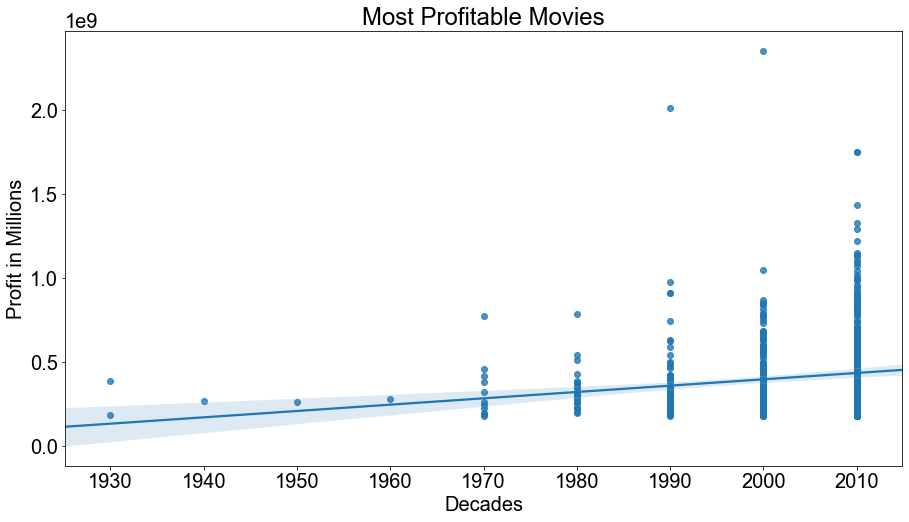

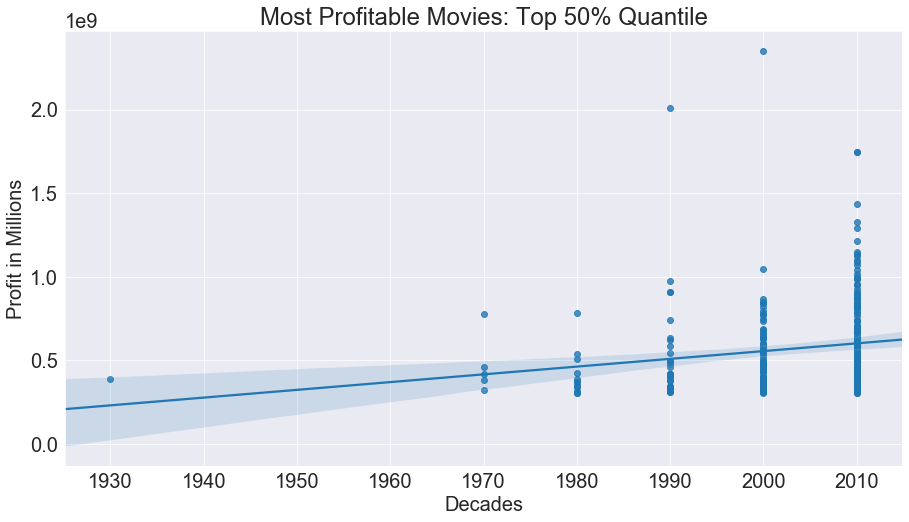

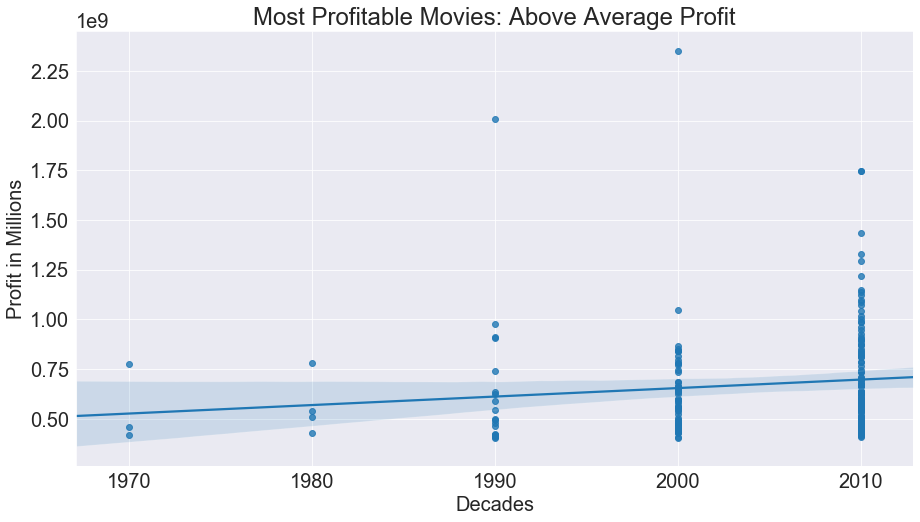

In [45]:
plot_decade_df(top_movies, 'Most Profitable Movies')
plot_decade_df(top_50_percent_profit, 'Most Profitable Movies: Top 50% Quantile')
plot_decade_df(above_mean_profit, 'Most Profitable Movies: Above Average Profit')

In [46]:
def plot_years_df(df, label):
    plt.figure(figsize=(15,8))
    plt.title(label)
    if 'top_movies':
        sns.set_style('darkgrid')
        sns.regplot(x="years", y="total_profit", data=df);
        plt.xlabel('Years')
        plt.ylabel('Profit in Millions')
    elif 'top_50_percent_profit':
        sns.set_style('darkgrid')
        sns.regplot(x="years", y="total_profit", data=df);
        plt.xlabel('Years')
        plt.ylabel('Profit in Millions')
    else:
        sns.set_style('darkgrid')
        sns.regplot(x="years", y="total_profit", data=df);
        plt.xlabel('Years')
        plt.ylabel('Profit in Millions')

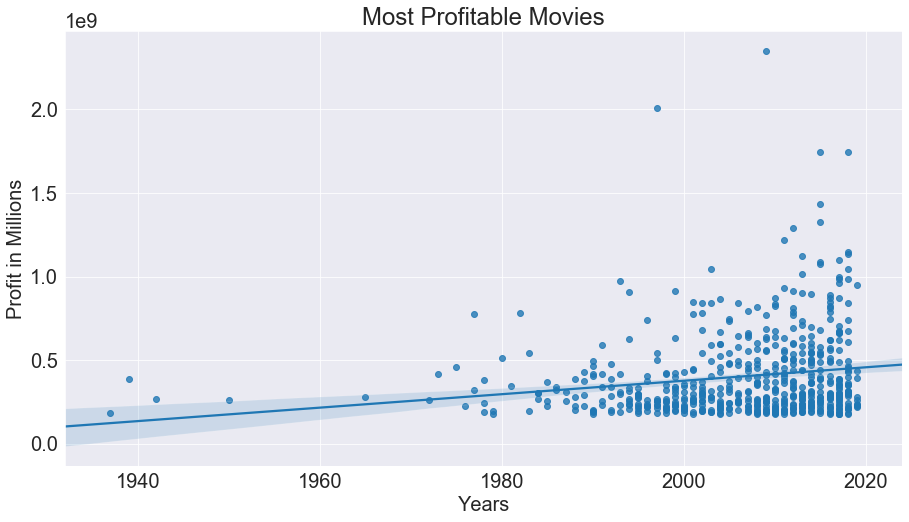

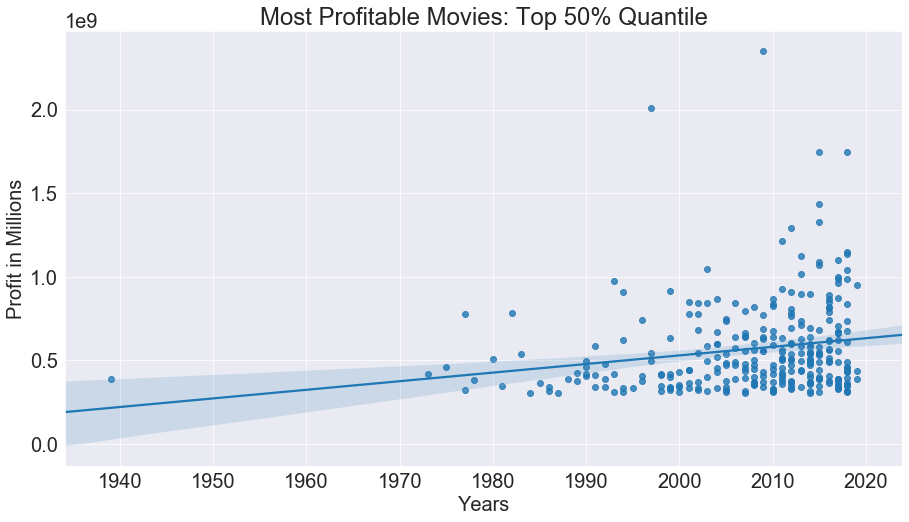

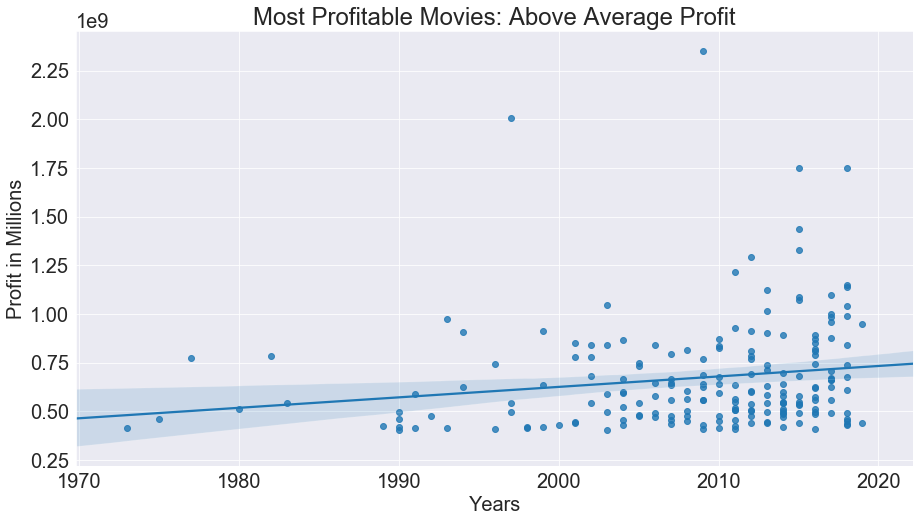

In [47]:
plot_years_df(top_movies, 'Most Profitable Movies')
plot_years_df(top_50_percent_profit, 'Most Profitable Movies: Top 50% Quantile')
plot_years_df(above_mean_profit, 'Most Profitable Movies: Above Average Profit')

In [48]:
def plot_month_df(df, label):
    plt.figure(figsize=(15,8))
    plt.title(label)
    if 'top_movies':
        sns.set_style('darkgrid')
        sns.regplot(x="month", y="total_profit", data=df);
        plt.xlabel('Months')
        plt.ylabel('Profit in Millions')
    elif 'top_50_percent_profit':
        sns.set_style('darkgrid')
        sns.regplot(x="month", y="total_profit", data=df);
        plt.xlabel('Months')
        plt.ylabel('Profit in Millions')
    else:
        sns.set_style('darkgrid')
        sns.regplot(x="month", y="total_profit", data=df);
        plt.xlabel('Months')
        plt.ylabel('Profit in Millions')

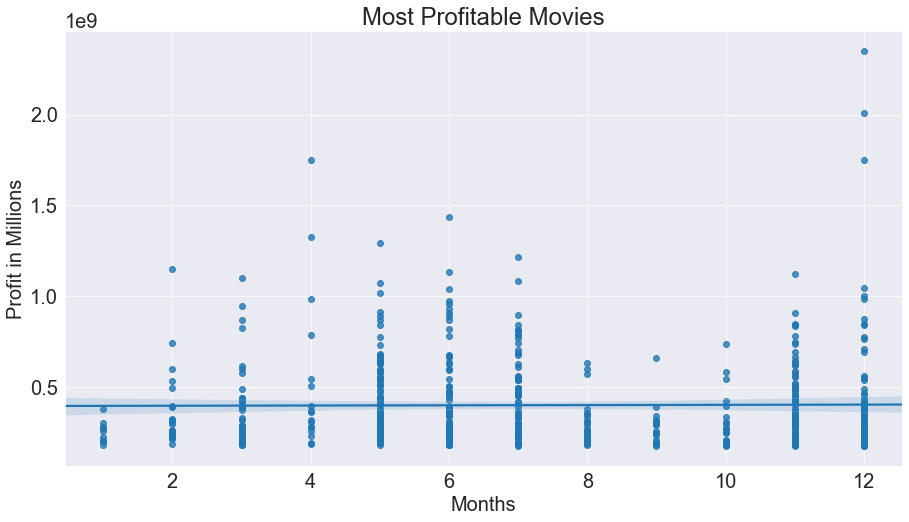

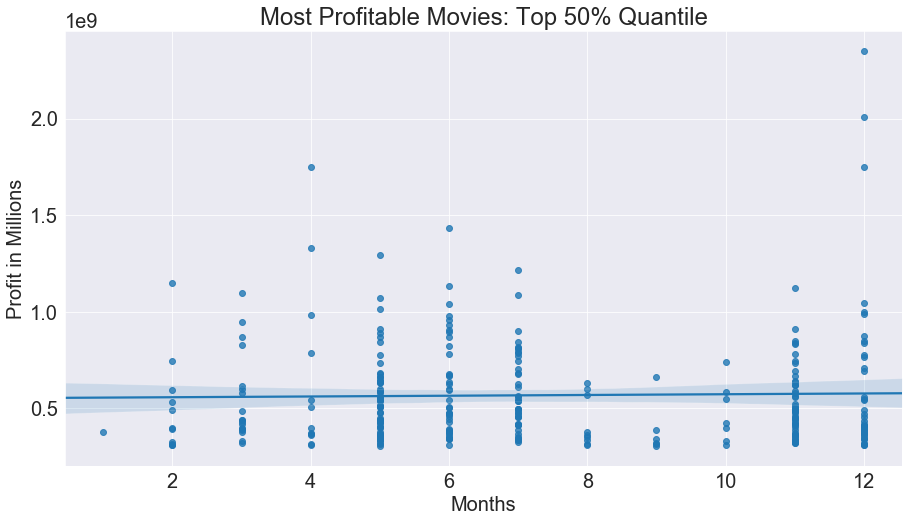

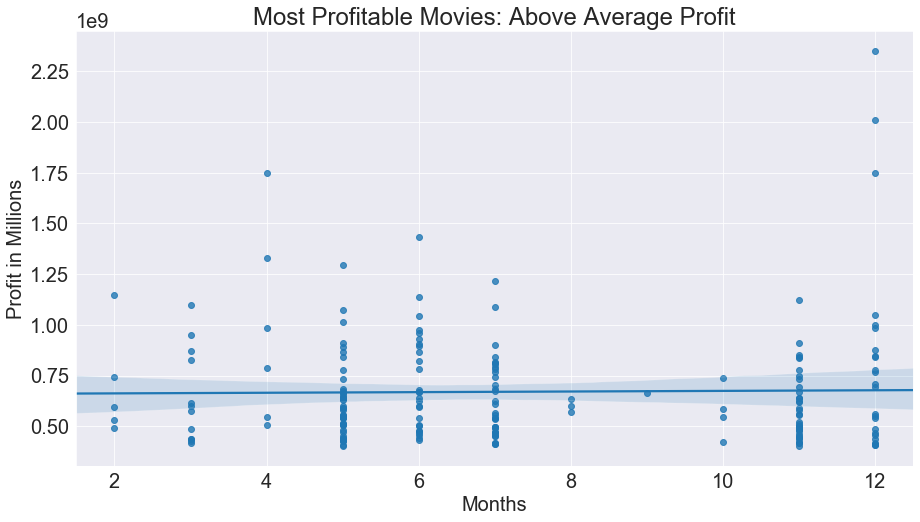

In [49]:
plot_month_df(top_movies, 'Most Profitable Movies')
plot_month_df(top_50_percent_profit, 'Most Profitable Movies: Top 50% Quantile')
plot_month_df(above_mean_profit, 'Most Profitable Movies: Above Average Profit')

In [50]:
top_movies.head()

,release_date,movie,domestic_gross,total_profit,years,month,month_name,decade
0,2009-12-18,Avatar,760507625,2351345279,2009,12,Dec,2000
42,1997-12-19,Titanic,659363944,2008208395,1997,12,Dec,1990
6,2018-04-27,Avengers: Infinity War,678815482,1748134200,2018,4,Apr,2010
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,936662225,1747311220,2015,12,Dec,2010
33,2015-06-12,Jurassic World,652270625,1433854864,2015,6,Jun,2010


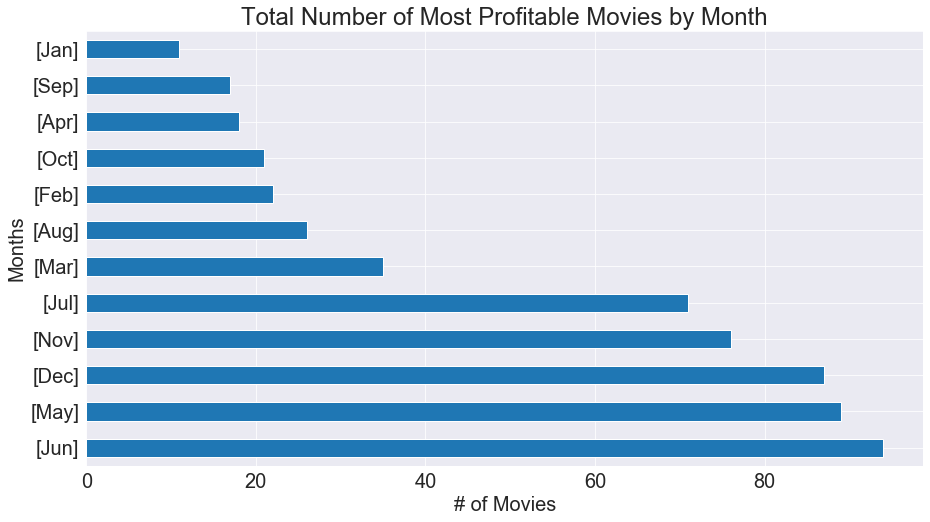

In [51]:
top_movies_group = top_movies.groupby(['movie']).month_name.unique().value_counts()
top_movies_group = top_movies_group[top_movies_group!=1]

top_movies_group.plot(kind='barh', figsize=(15,8))
plt.title('Total Number of Most Profitable Movies by Month')
plt.xlabel("# of Movies")
plt.ylabel('Months')
plt.show()

In [52]:
top_movies_group

[Jun]    94
[May]    89
[Dec]    87
[Nov]    76
[Jul]    71
[Mar]    35
[Aug]    26
[Feb]    22
[Oct]    21
[Apr]    18
[Sep]    17
[Jan]    11
Name: month_name, dtype: int64

### Insights/Findings/Recommendations

**Findings**

After examining the top 10% of the most profitable films of all time, I found that a high concentration of the most profitable films are released during May, June, July, November, and December. Though December has one of the highest concetrations of most profitable films, the following month, January, has the lowest concentrations. We also see a gradual increase in average revenue earnings, when looking at mean values, the top 5%, and overall earnings over years and decades, even though the minimum values for the highest profit films have not significantly changed.

**Recommendations**
* If looking for a period of time for a film,premier it in June
* If going for a Winter release, releases during the end of winter might perform better than mid-to-late winter  


**Next Steps**
* Plan on exploring further correlations between profitability and directors, studios, and international releases  
* If possible, gather missing movie information.